<h1 style="margin-left: 20px; color:blue">1. Importing the required libraries</h1>

In [1]:
import pandas as pd
import requests
from io import BytesIO
from zipfile import ZipFile

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<h1 style="margin-left: 20px; color:blue">2. Loading the data into the data frame</h1>

In [3]:
def load_credit_data(url: str) -> pd.DataFrame:
    """
    Loads South German Credit dataset from a ZIP file URL and returns a DataFrame.
    
    Parameters:
    url (str): URL of the ZIP file containing the dataset.
    
    Returns:
    pd.DataFrame: DataFrame containing the loaded dataset.
    """
    try:
        # Download the ZIP file
        response = requests.get(url)
        # Check if download was successful
        if response.status_code == 200:
            # Extract the contents of the ZIP file
            with ZipFile(BytesIO(response.content)) as zip_file:
                # List all files in the ZIP archive
                file_list = zip_file.namelist()
                
                # Find the SouthGermanCredit.asc file
                csv_file = next((file for file in file_list if file.lower().endswith('.asc')), None)
                
                if csv_file:
                    # Read the CSV file into a DataFrame
                    df = pd.read_csv(zip_file.open(csv_file), delimiter=' ')
                    return df
                else:
                    print("SouthGermanCredit.asc file not found in the ZIP archive.")
                    return None
        else:
            print(f"Failed to download ZIP file. Status code: {response.status_code}")
            return None
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

# Example usage:
url = "https://archive.ics.uci.edu/static/public/573/south+german+credit+update.zip"
credit_df = load_credit_data(url)

In [5]:
credit_df

laufkont  laufzeit  moral  verw  hoehe  sparkont  beszeit  rate  famges  \
0           1        18      4     2   1049         1        2     4       2   
1           1         9      4     0   2799         1        3     2       3   
2           2        12      2     9    841         2        4     2       2   
3           1        12      4     0   2122         1        3     3       3   
4           1        12      4     0   2171         1        3     4       3   
..        ...       ...    ...   ...    ...       ...      ...   ...     ...   
995         1        24      2     3   1987         1        3     2       3   
996         1        24      2     0   2303         1        5     4       3   
997         4        21      4     0  12680         5        5     4       3   
998         2        12      2     3   6468         5        1     2       3   
999         1        30      2     2   6350         5        5     4       3   

     buerge  ...  verm  alter  weitkred  wohn  bishkred  beruf  pers  telef  \
0         1  ...     2     21         3     1         1      3     2      1   
1         1  ...     1     36         3     1         2      3     1      1   
2         1  ...     1     23         3     1         1      2     2      1   
3         1  ...     1     39         3     1         2      2     1      1   
4         1  ...     2     38         1     2         2      2     2      1   
..      ...  ...   ...    ...       ...   ...       ...    ...   ...    ...   
995       1  ...     1     21         3     1         1      2     1      1   
996       2  ...     1     45         3     2         1      3     2      1   
997       1  ...     4     30         3     3         1      4     2      2   
998       1  ...     4     52         3     2         1      4     2      2   
999       1  ...     2     31         3     2         1      3     2      1   

     gastarb  kredit  
0          2       1  
1          2       1  
2          2       1  
3          1       1  
4          1       1  
..       ...     ...  
995        2       0  
996        2       0  
997        2       0  
998        2       0  
999        2       0  

[1000 rows x 21 columns]

In [7]:
credit_df.columns

Index(['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit'],
      dtype='object')

<h1 style="margin-left: 20px; color:blue">3. Exploratory Data Analysis</h1>

In [15]:
from ydata_profiling import ProfileReport
profile = ProfileReport(credit_df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(credit_df), columns=credit_df.columns)
df_scaled

laufkont  laufzeit     moral      verw     hoehe  sparkont   beszeit  \
0   -1.254566 -0.240857  1.344014 -0.301852 -0.787657 -0.699707 -1.145978   
1   -1.254566 -0.987573  1.344014 -1.030963 -0.167384 -0.699707 -0.317959   
2   -0.459026 -0.738668 -0.503428  2.250036 -0.861381 -0.066488  0.510060   
3   -1.254566 -0.738668  1.344014 -1.030963 -0.407341 -0.699707 -0.317959   
4   -1.254566 -0.738668  1.344014 -1.030963 -0.389974 -0.699707 -0.317959   
..        ...       ...       ...       ...       ...       ...       ...   
995 -1.254566  0.256953 -0.503428  0.062704 -0.455191 -0.699707 -0.317959   
996 -1.254566  0.256953 -0.503428 -1.030963 -0.343187 -0.699707  1.338078   
997  1.132053  0.008048  1.344014 -1.030963  3.334852  1.833169  1.338078   
998 -0.459026 -0.738668 -0.503428  0.062704  1.133062  1.833169 -1.973997   
999 -1.254566  0.754763 -0.503428 -0.301852  1.091237  1.833169  1.338078   

         rate    famges    buerge  ...      verm     alter  weitkred  \
0    0.918477 -0.963650 -0.303686  ... -0.341055 -1.281573  0.460831   
1   -0.870183  0.449326 -0.303686  ... -1.293723  0.040363  0.460831   
2   -0.870183 -0.963650 -0.303686  ... -1.293723 -1.105315  0.460831   
3    0.024147  0.449326 -0.303686  ... -1.293723  0.304750  0.460831   
4    0.918477  0.449326 -0.303686  ... -0.341055  0.216621 -2.375050   
..        ...       ...       ...  ...       ...       ...       ...   
995 -0.870183  0.449326 -0.303686  ... -1.293723 -1.281573  0.460831   
996  0.918477  0.449326  1.790699  ... -1.293723  0.833525  0.460831   
997  0.918477  0.449326 -0.303686  ...  1.564281 -0.488411  0.460831   
998 -0.870183  0.449326 -0.303686  ...  1.564281  1.450428  0.460831   
999  0.918477  0.449326 -0.303686  ... -0.341055 -0.400282  0.460831   

         wohn  bishkred     beruf      pers     telef   gastarb    kredit  
0   -1.751205 -0.704926  0.146949  0.428290 -0.823318  0.196014  0.654654  
1   -1.751205  1.027079  0.146949 -2.334869 -0.823318  0.196014  0.654654  
2   -1.751205 -0.704926 -1.383771  0.428290 -0.823318  0.196014  0.654654  
3   -1.751205  1.027079 -1.383771 -2.334869 -0.823318 -5.101669  0.654654  
4    0.135869  1.027079 -1.383771  0.428290 -0.823318 -5.101669  0.654654  
..        ...       ...       ...       ...       ...       ...       ...  
995 -1.751205 -0.704926 -1.383771 -2.334869 -0.823318  0.196014 -1.527525  
996  0.135869 -0.704926  0.146949  0.428290 -0.823318  0.196014 -1.527525  
997  2.022944 -0.704926  1.677670  0.428290  1.214598  0.196014 -1.527525  
998  0.135869 -0.704926  1.677670  0.428290  1.214598  0.196014 -1.527525  
999  0.135869 -0.704926  0.146949  0.428290 -0.823318  0.196014 -1.527525  

[1000 rows x 21 columns]

<h1 style="margin-left: 20px; color:blue">4. Building 2 Clustering Models</h1>

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


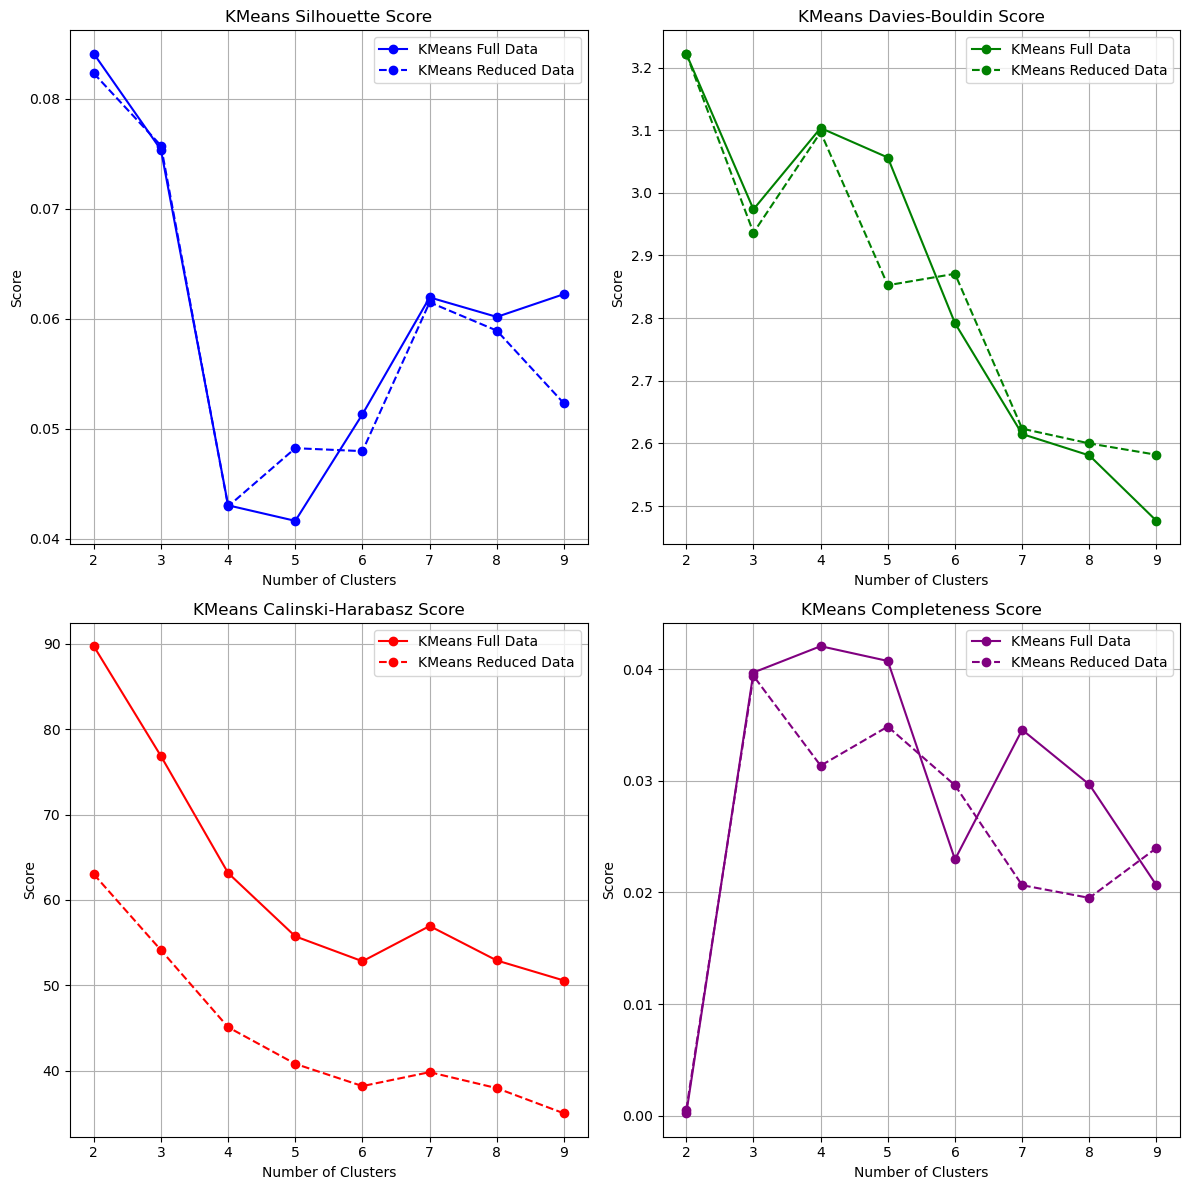

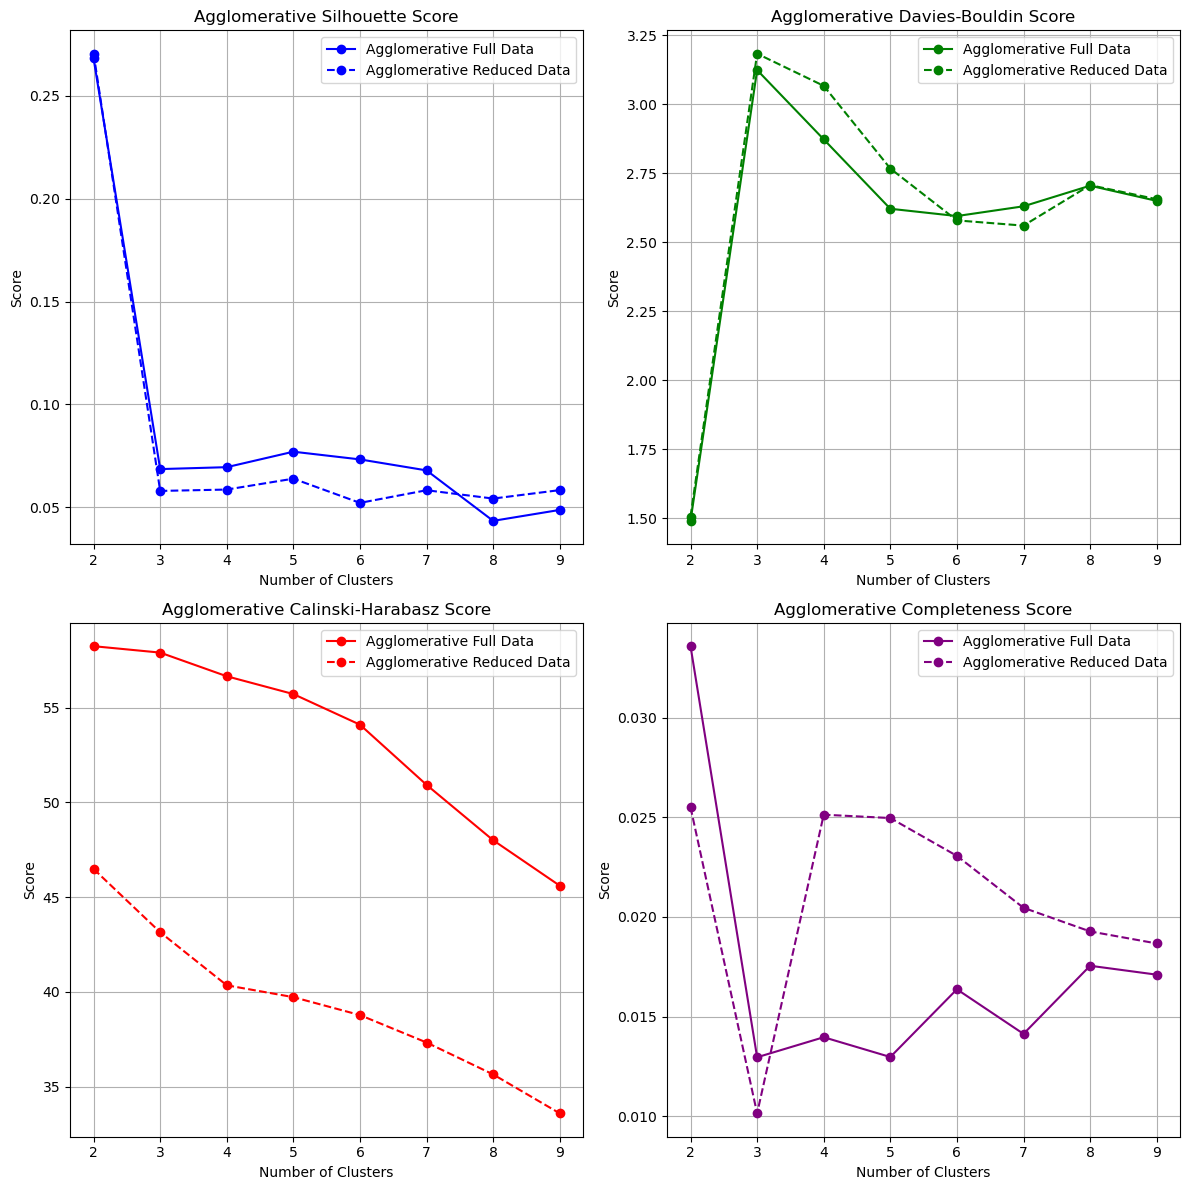

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, completeness_score

# Function to calculate clustering metrics
def calculate_metrics(X, labels_true, cluster_range, clustering_model):
    silhouette_scores = []
    davies_bouldin_scores = []
    calinski_harabasz_scores = []
    completeness_scores = []
    
    for n_clusters in cluster_range:
        model = clustering_model(n_clusters=n_clusters, random_state=42) if clustering_model == KMeans else clustering_model(n_clusters=n_clusters)
        cluster_labels = model.fit_predict(X)
        
        silhouette = silhouette_score(X, cluster_labels)
        davies_bouldin = davies_bouldin_score(X, cluster_labels)
        calinski_harabasz = calinski_harabasz_score(X, cluster_labels)
        completeness = completeness_score(labels_true, cluster_labels)
        
        silhouette_scores.append(silhouette)
        davies_bouldin_scores.append(davies_bouldin)
        calinski_harabasz_scores.append(calinski_harabasz)
        completeness_scores.append(completeness)
    
    return silhouette_scores, davies_bouldin_scores, calinski_harabasz_scores, completeness_scores

# Original data
# X_full = credit_df.drop('kredit', axis=1) # If uncomment this line and use the data without standardization, the results will differ ...
X_full = df_scaled.drop('kredit', axis=1)
# labels_true_full = credit_df['kredit'] # If uncomment this line and use the data without standardization, the results will differ ...
labels_true_full = df_scaled['kredit']
# Reduced data (losing 30% of the information)
X_reduced = X_full.sample(frac=0.7, random_state=42)
labels_true_reduced = labels_true_full.loc[X_reduced.index]

# Define cluster range
cluster_range = range(2, 10)

# Calculate metrics for KMeans with full data
silhouette_kmeans_full, davies_bouldin_kmeans_full, calinski_harabasz_kmeans_full, completeness_kmeans_full = calculate_metrics(X_full, labels_true_full, cluster_range, KMeans)

# Calculate metrics for KMeans with reduced data
silhouette_kmeans_reduced, davies_bouldin_kmeans_reduced, calinski_harabasz_kmeans_reduced, completeness_kmeans_reduced = calculate_metrics(X_reduced, labels_true_reduced, cluster_range, KMeans)

# Calculate metrics for AgglomerativeClustering with full data
silhouette_agglo_full, davies_bouldin_agglo_full, calinski_harabasz_agglo_full, completeness_agglo_full = calculate_metrics(X_full, labels_true_full, cluster_range, AgglomerativeClustering)

# Calculate metrics for AgglomerativeClustering with reduced data
silhouette_agglo_reduced, davies_bouldin_agglo_reduced, calinski_harabasz_agglo_reduced, completeness_agglo_reduced = calculate_metrics(X_reduced, labels_true_reduced, cluster_range, AgglomerativeClustering)

# Plot the results for KMeans
plt.figure(figsize=(12, 12))

# Silhouette score
plt.subplot(2, 2, 1)
plt.plot(cluster_range, silhouette_kmeans_full, marker='o', linestyle='-', color='b', label='KMeans Full Data')
plt.plot(cluster_range, silhouette_kmeans_reduced, marker='o', linestyle='--', color='b', label='KMeans Reduced Data')
plt.title('KMeans Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.xticks(cluster_range)
plt.legend()
plt.grid(True)

# Davies-Bouldin score
plt.subplot(2, 2, 2)
plt.plot(cluster_range, davies_bouldin_kmeans_full, marker='o', linestyle='-', color='g', label='KMeans Full Data')
plt.plot(cluster_range, davies_bouldin_kmeans_reduced, marker='o', linestyle='--', color='g', label='KMeans Reduced Data')
plt.title('KMeans Davies-Bouldin Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.xticks(cluster_range)
plt.legend()
plt.grid(True)

# Calinski-Harabasz score
plt.subplot(2, 2, 3)
plt.plot(cluster_range, calinski_harabasz_kmeans_full, marker='o', linestyle='-', color='r', label='KMeans Full Data')
plt.plot(cluster_range, calinski_harabasz_kmeans_reduced, marker='o', linestyle='--', color='r', label='KMeans Reduced Data')
plt.title('KMeans Calinski-Harabasz Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.xticks(cluster_range)
plt.legend()
plt.grid(True)

# Completeness score
plt.subplot(2, 2, 4)
plt.plot(cluster_range, completeness_kmeans_full, marker='o', linestyle='-', color='purple', label='KMeans Full Data')
plt.plot(cluster_range, completeness_kmeans_reduced, marker='o', linestyle='--', color='purple', label='KMeans Reduced Data')
plt.title('KMeans Completeness Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.xticks(cluster_range)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot the results for AgglomerativeClustering
plt.figure(figsize=(12, 12))

# Silhouette score
plt.subplot(2, 2, 1)
plt.plot(cluster_range, silhouette_agglo_full, marker='o', linestyle='-', color='b', label='Agglomerative Full Data')
plt.plot(cluster_range, silhouette_agglo_reduced, marker='o', linestyle='--', color='b', label='Agglomerative Reduced Data')
plt.title('Agglomerative Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.xticks(cluster_range)
plt.legend()
plt.grid(True)

# Davies-Bouldin score
plt.subplot(2, 2, 2)
plt.plot(cluster_range, davies_bouldin_agglo_full, marker='o', linestyle='-', color='g', label='Agglomerative Full Data')
plt.plot(cluster_range, davies_bouldin_agglo_reduced, marker='o', linestyle='--', color='g', label='Agglomerative Reduced Data')
plt.title('Agglomerative Davies-Bouldin Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.xticks(cluster_range)
plt.legend()
plt.grid(True)

# Calinski-Harabasz score
plt.subplot(2, 2, 3)
plt.plot(cluster_range, calinski_harabasz_agglo_full, marker='o', linestyle='-', color='r', label='Agglomerative Full Data')
plt.plot(cluster_range, calinski_harabasz_agglo_reduced, marker='o', linestyle='--', color='r', label='Agglomerative Reduced Data')
plt.title('Agglomerative Calinski-Harabasz Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.xticks(cluster_range)
plt.legend()
plt.grid(True)

# Completeness score
plt.subplot(2, 2, 4)
plt.plot(cluster_range, completeness_agglo_full, marker='o', linestyle='-', color='purple', label='Agglomerative Full Data')
plt.plot(cluster_range, completeness_agglo_reduced, marker='o', linestyle='--', color='purple', label='Agglomerative Reduced Data')
plt.title('Agglomerative Completeness Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.xticks(cluster_range)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
